In [24]:
import MDAnalysis as mda

u = mda.Universe("movie_frag.pdb")

center_of_mass_z = []

for ts in u.trajectory:
    com = u.atoms.center_of_mass()
    z = com[2]
    center_of_mass_z.append(z)

# print(center_of_mass_z)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

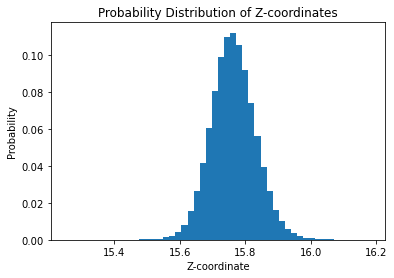

In [26]:
num_bins = 50
hist, bins = np.histogram(center_of_mass_z, bins=num_bins)

# Step 3: Count the occurrences of z-coordinates in each bin (Already done in np.histogram)

# Step 4: Calculate the probabilities for each bin
bin_probabilities = hist / len(center_of_mass_z)

# Step 5: Plot the histogram
plt.bar(bins[:-1], bin_probabilities, width=(bins[1] - bins[0]), align='edge')
plt.xlabel('Z-coordinate')
plt.ylabel('Probability')
plt.title('Probability Distribution of Z-coordinates')
plt.show()


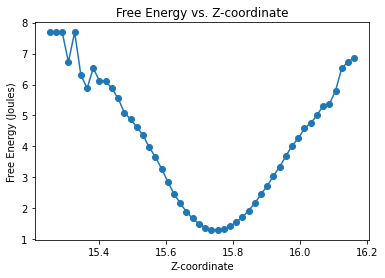

In [27]:
# Constants
k_boltzmann = 0.001987  # Boltzmann constant in J/K (you may need to use a different unit depending on your data)
temperature = 300  # Temperature in Kelvin (you can adjust this as needed)

# Step 5: Calculate the free energy with F = -kT * log(P)
free_energy = -k_boltzmann * temperature * np.log(bin_probabilities)

# Step 6: Plot the free energy with z-coordinates
plt.plot(bins[:-1], free_energy, marker='o')
plt.xlabel('Z-coordinate')
plt.ylabel('Free Energy (Joules)')
plt.title('Free Energy vs. Z-coordinate')
plt.show()


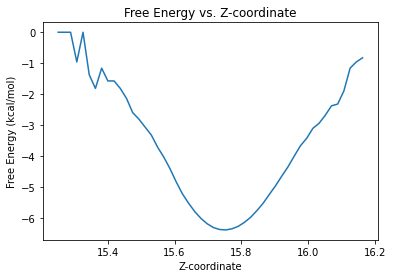

In [38]:
# Constants
k_boltzmann = 0.001987  # Boltzmann constant in J/K (you may need to use a different unit depending on your data)
temperature = 300  # Temperature in Kelvin (you can adjust this as needed)

# Step 5: Calculate the free energy with F = -kT * log(P)
# free_energy = -k_boltzmann * temperature * np.log(bin_probabilities)
free_energy = -k_boltzmann * temperature * np.log(np.nan_to_num(bin_probabilities))

# print(free_energy)

# max_free_energy = np.max(free_energy)
max_free_energy = np.nanmax(free_energy)
# print(max_free_energy)
normalized_free_energy = free_energy - max_free_energy
# print(normalized_free_energy)

# Step 6: Plot the free energy with z-coordinates
# plt.plot(bins[:-1], normalized_free_energy, marker='o')
plt.plot(bins[:-1], normalized_free_energy)

plt.xlabel('Z-coordinate')
plt.ylabel('Free Energy (kcal/mol)')
plt.title('Free Energy vs. Z-coordinate')
# plt.show()
plt.savefig('Free.png', dpi=300)